In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import *
from keras.models import Model
import cv2
import glob
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# Any results you write to the current directory are saved as output.
import random
import matplotlib.pyplot as plt
import keras.backend as K

Using TensorFlow backend.


In [2]:
namedir=glob.glob("../input/data/train/*")

In [3]:
namedir

['../input/data/train/jerry_seinfeld',
 '../input/data/train/ben_afflek',
 '../input/data/train/elton_john',
 '../input/data/train/mindy_kaling',
 '../input/data/train/madonna']

In [4]:
def loadimage(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(128,128))
    return img

In [5]:
imgdir1=glob.glob(namedir[1]+"/*")

In [6]:
img1=loadimage(imgdir1[3])

In [7]:
namedict={}
namelist=[]
for i in namedir:
    l=glob.glob(i+"/*")
    namelist.append(i.split("/")[-1])
    namedict[i.split("/")[-1]]=l
    

In [8]:
namelist

['jerry_seinfeld', 'ben_afflek', 'elton_john', 'mindy_kaling', 'madonna']

In [9]:
len(namedict[namelist[0]])

21

In [10]:
length1=[len(namedict[i]) for i in namelist]

In [11]:
length1

[21, 14, 17, 22, 19]

In [12]:
namelen=dict(list(zip(namelist,length1)))

In [13]:
namelen

{'jerry_seinfeld': 21,
 'ben_afflek': 14,
 'elton_john': 17,
 'mindy_kaling': 22,
 'madonna': 19}

In [14]:
#Dataset preparation

In [15]:
context=[]
similar=[]
diff=[]
xtrain1=[]
xtrain2=[]
xtrain3=[]

for i in range(4000):
    x1=random.sample(namelist,1)[0]
    x2=random.sample(namelist,1)[0]
    if x2==x1:
        x2=random.sample(namelist,1)[0]
    
    pos1=random.sample(list(np.arange(namelen[x1])),1)[0]
    pos2=random.sample(list(np.arange(namelen[x1])),1)[0]
    if pos2==pos1:
        pos2=random.sample(list(np.arange(namelen[x1])),1)[0]
    
    img1=loadimage(namedict[x1][pos1])
    img2=loadimage(namedict[x1][pos2])
    img3=loadimage(random.sample(namedict[x2],1)[0])
    
    xtrain1.append(img1)
    xtrain2.append(img2)
    xtrain3.append(img3)
    
    
    
        
    

In [16]:
inpshape=(128,128,3)

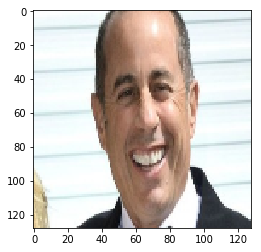

In [17]:
plt.imshow(xtrain1[0])

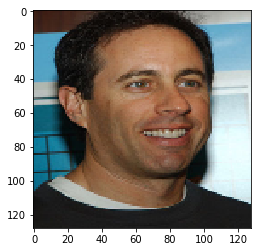

In [18]:
plt.imshow(xtrain2[0])

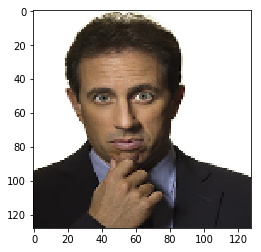

In [19]:
plt.imshow(xtrain3[0])

In [20]:
xtrain1=np.array(xtrain1)
xtrain2=np.array(xtrain2)
xtrain3=np.array(xtrain3)

In [21]:
xtrain1=xtrain1/255
xtrain2=xtrain2/255
xtrain3=xtrain3/255

In [22]:
#Making model
inp=Input((128,128,3))
x=Conv2D(32,4,strides=1)(inp)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)
x=Activation('relu')(x)

x=Conv2D(32,4,strides=2)(x)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)
x=Activation('relu')(x)

x=Conv2D(64,3,strides=2)(x)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)
x=Activation('relu')(x)

x=Conv2D(64,3,strides=2)(x)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)
x=Activation('relu')(x)

out=GlobalAveragePooling2D()(x)

In [23]:
model=Model(inp,out)

In [24]:
inp1=Input((128,128,3))
out1=model(inp1)

In [25]:
inp2=Input((128,128,3))
out2=model(inp2)

In [26]:
inp3=Input((128,128,3))
out3=model(inp3)

In [27]:
out=Concatenate()([out1,out2,out3])

In [28]:
finalmodel=Model([inp1,inp2,inp3],out)

In [29]:
finalmodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 64)           74176       input_2[0][0]                    
                                                                 input_3[0][0]                    
          

In [30]:
def lossfunction(ytrue,ypred):
    yc=ypred[:,:64]
    ys=ypred[:,64:128]
    ydis=ypred[:,128:]
    eps=10
    loss1=K.mean(K.square(yc-ys)-K.square(yc-ydis)+eps)
    return loss1

In [31]:
finalmodel.compile(optimizer='adam',loss=lossfunction)

In [32]:
finalmodel.fit([xtrain1,xtrain2,xtrain3],np.ones((4000,1)),batch_size=32,epochs=500,shuffle=True)

Epoch 1/500
4000/4000 [==============================] - 9s 2ms/step - loss: 9.9270
Epoch 2/500
4000/4000 [==============================] - 5s 1ms/step - loss: 9.7534
Epoch 3/500
4000/4000 [==============================] - 6s 1ms/step - loss: 9.4267
Epoch 4/500
4000/4000 [==============================] - 5s 1ms/step - loss: 8.2734
Epoch 5/500
4000/4000 [==============================] - 5s 1ms/step - loss: 6.5749
Epoch 6/500
4000/4000 [==============================] - 5s 1ms/step - loss: 4.6486
Epoch 7/500
4000/4000 [==============================] - 5s 1ms/step - loss: 2.6743
Epoch 8/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.7282
Epoch 9/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1.5730
Epoch 10/500
4000/4000 [==============================] - 5s 1ms/step - loss: -3.9374
Epoch 11/500
4000/4000 [==============================] - 5s 1ms/step - loss: -6.2962
Epoch 12/500
4000/4000 [==============================] - 5s 1ms/step -

4000/4000 [==============================] - 5s 1ms/step - loss: -486.3749
Epoch 95/500
4000/4000 [==============================] - 5s 1ms/step - loss: -493.3205
Epoch 96/500
4000/4000 [==============================] - 5s 1ms/step - loss: -504.2506
Epoch 97/500
4000/4000 [==============================] - 5s 1ms/step - loss: -512.1931
Epoch 98/500
4000/4000 [==============================] - 5s 1ms/step - loss: -522.1590
Epoch 99/500
4000/4000 [==============================] - 6s 1ms/step - loss: -530.0278
Epoch 100/500
4000/4000 [==============================] - 5s 1ms/step - loss: -538.3313
Epoch 101/500
4000/4000 [==============================] - 6s 1ms/step - loss: -548.4009
Epoch 102/500
4000/4000 [==============================] - 5s 1ms/step - loss: -555.4613
Epoch 103/500
4000/4000 [==============================] - 5s 1ms/step - loss: -569.7209
Epoch 104/500
4000/4000 [==============================] - 5s 1ms/step - loss: -576.6609
Epoch 105/500
4000/4000 [===============

4000/4000 [==============================] - 6s 1ms/step - loss: -1592.7550
Epoch 186/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1605.9015
Epoch 187/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1616.4309
Epoch 188/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1636.0169
Epoch 189/500
4000/4000 [==============================] - 6s 1ms/step - loss: -1653.9889
Epoch 190/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1677.7787
Epoch 191/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1689.3061
Epoch 192/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1701.8239
Epoch 193/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1710.0931
Epoch 194/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1739.3238
Epoch 195/500
4000/4000 [==============================] - 5s 1ms/step - loss: -1752.7702
Epoch 196/500
4000/4000 

4000/4000 [==============================] - 6s 1ms/step - loss: -3288.9136
Epoch 277/500
4000/4000 [==============================] - 5s 1ms/step - loss: -3299.4517
Epoch 278/500
4000/4000 [==============================] - 5s 1ms/step - loss: -3328.8614
Epoch 279/500
4000/4000 [==============================] - 5s 1ms/step - loss: -3345.5786
Epoch 280/500
4000/4000 [==============================] - 5s 1ms/step - loss: -3395.1286
Epoch 281/500
4000/4000 [==============================] - 5s 1ms/step - loss: -3401.5981
Epoch 282/500
4000/4000 [==============================] - 6s 1ms/step - loss: -3418.5548
Epoch 283/500
4000/4000 [==============================] - 5s 1ms/step - loss: -3454.3493
Epoch 284/500
4000/4000 [==============================] - 5s 1ms/step - loss: -3469.2887
Epoch 285/500
4000/4000 [==============================] - 6s 1ms/step - loss: -3487.6561
Epoch 286/500
4000/4000 [==============================] - 6s 1ms/step - loss: -3527.9050
Epoch 287/500
4000/4000 

4000/4000 [==============================] - 5s 1ms/step - loss: -5576.0408
Epoch 368/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5556.9390
Epoch 369/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5647.7189
Epoch 370/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5645.1113
Epoch 371/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5706.3984
Epoch 372/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5717.1294
Epoch 373/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5725.1398
Epoch 374/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5750.8643
Epoch 375/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5811.0029
Epoch 376/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5822.8404
Epoch 377/500
4000/4000 [==============================] - 5s 1ms/step - loss: -5844.4381
Epoch 378/500
4000/4000 

4000/4000 [==============================] - 5s 1ms/step - loss: -8481.5780
Epoch 459/500
4000/4000 [==============================] - 5s 1ms/step - loss: -8435.8917
Epoch 460/500
4000/4000 [==============================] - 5s 1ms/step - loss: -8454.2727
Epoch 461/500
4000/4000 [==============================] - 5s 1ms/step - loss: -8563.6336
Epoch 462/500
4000/4000 [==============================] - 5s 1ms/step - loss: -8588.1052
Epoch 463/500
4000/4000 [==============================] - 5s 1ms/step - loss: -8639.6576
Epoch 464/500
4000/4000 [==============================] - 5s 1ms/step - loss: -8661.4868
Epoch 465/500
4000/4000 [==============================] - 6s 1ms/step - loss: -8686.1314
Epoch 466/500
4000/4000 [==============================] - 5s 1ms/step - loss: -8700.8585
Epoch 467/500
4000/4000 [==============================] - 5s 1ms/step - loss: -8722.1826
Epoch 468/500
4000/4000 [==============================] - 5s 1ms/step - loss: -8828.1330
Epoch 469/500
4000/4000 

In [49]:
imges=[]
labels=[]
for i in namedir:
    for j in glob.glob(i+"/*"):
        imges.append(loadimage(j))
        labels.append(i.split("/")[-1])

In [50]:
imges=np.array(imges)

In [51]:
imges=imges/255

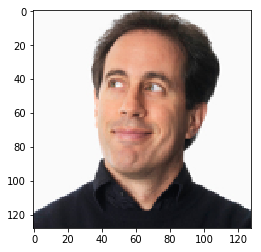

In [72]:
plt.imshow(imges[0])

In [52]:
namelist

['jerry_seinfeld', 'ben_afflek', 'elton_john', 'mindy_kaling', 'madonna']

In [37]:
name2ind=dict([j,i] for i,j in enumerate(namelist))

In [38]:
name2ind

{'jerry_seinfeld': 0,
 'ben_afflek': 1,
 'elton_john': 2,
 'mindy_kaling': 3,
 'madonna': 4}

In [55]:
labelnum=[name2ind[i] for i in labels]

In [56]:
encodings=model.predict(imges)

In [57]:
encodings.shape

(93, 64)

In [42]:
from sklearn.manifold import TSNE

In [43]:
tsne1=TSNE(n_components=2,perplexity=30,n_iter=5000)
data2=tsne1.fit_transform(encodings)

In [58]:
data2.shape

(93, 2)

In [59]:
df=pd.DataFrame({'a':data2[:,0],'b':data2[:,1],'label':labelnum})

In [60]:
df.head()

,a,b,label
0,1.640262,3.101357,0
1,1.997954,2.591576,0
2,1.730607,2.939926,0
3,1.829177,3.167444,0
4,2.282844,2.965642,0


In [53]:
# lets check via l2norm
# top 5 similar images

In [77]:
def top5(encod1):
    dist=dict([(j,np.linalg.norm(encod1-i)) for j,i in enumerate(encodings)])
    sortedval=sorted(dist.items(),key=lambda x:x[1])
    index5=[x[0] for x in sortedval][:5]
    fig,axes=plt.subplots(ncols=5,nrows=1,figsize=(50,50))
    for i in range(5):
        axes[i].imshow(imges[index5[i]])
    
    
    

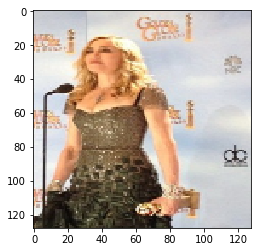

In [88]:
plt.imshow(imges[88])

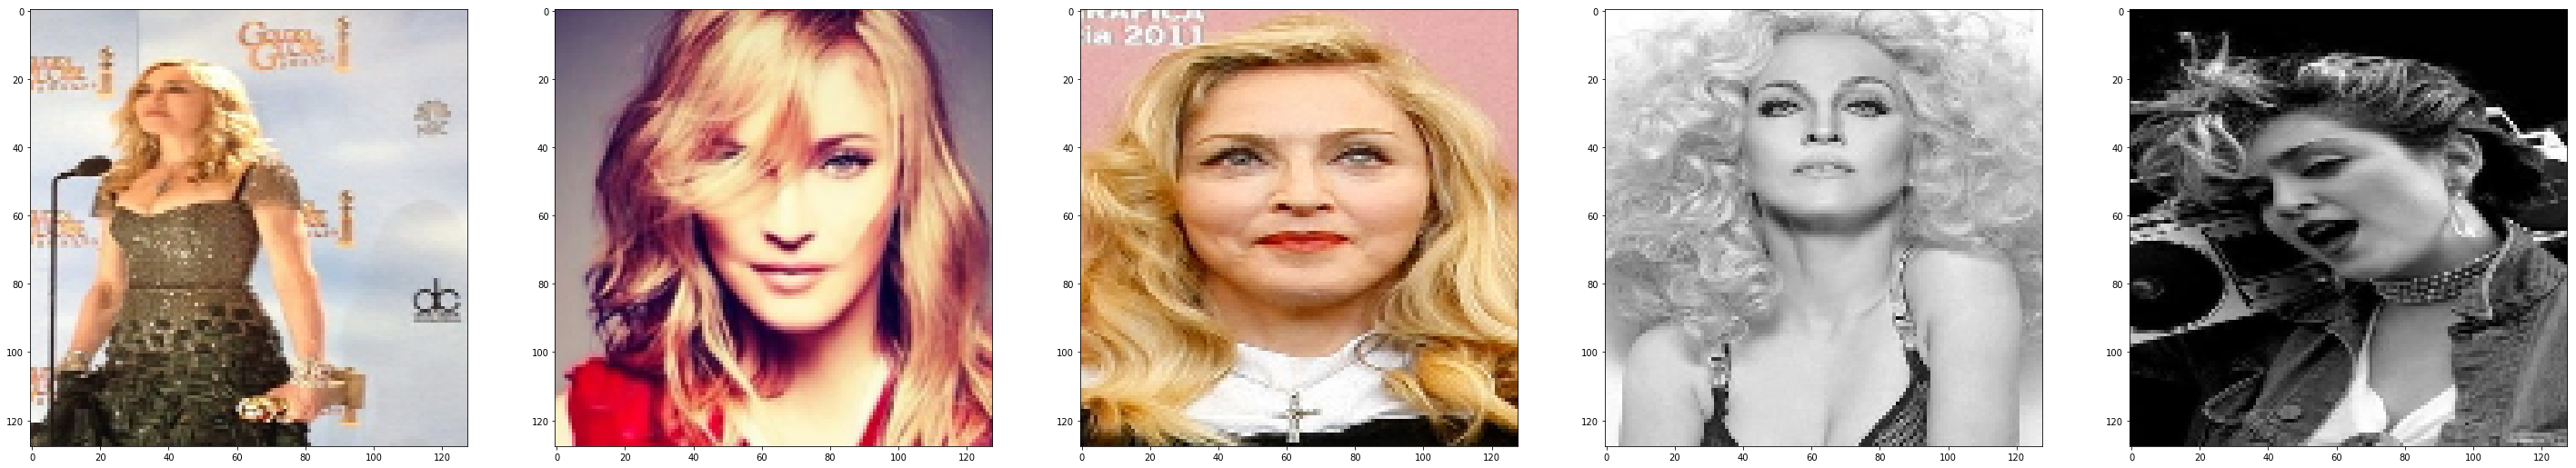

In [84]:
top5(encodings[88])

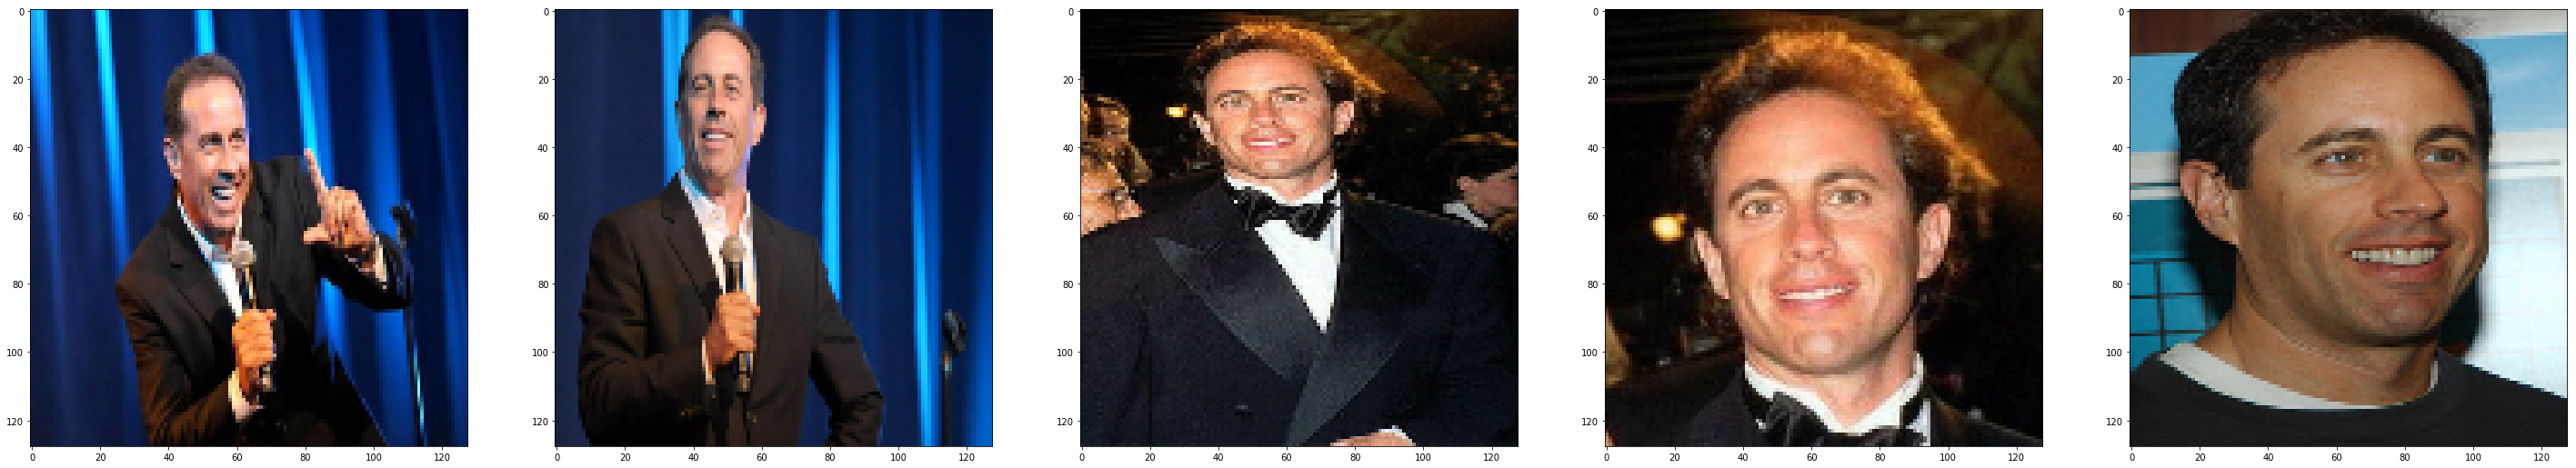

In [85]:
top5(encodings[15])

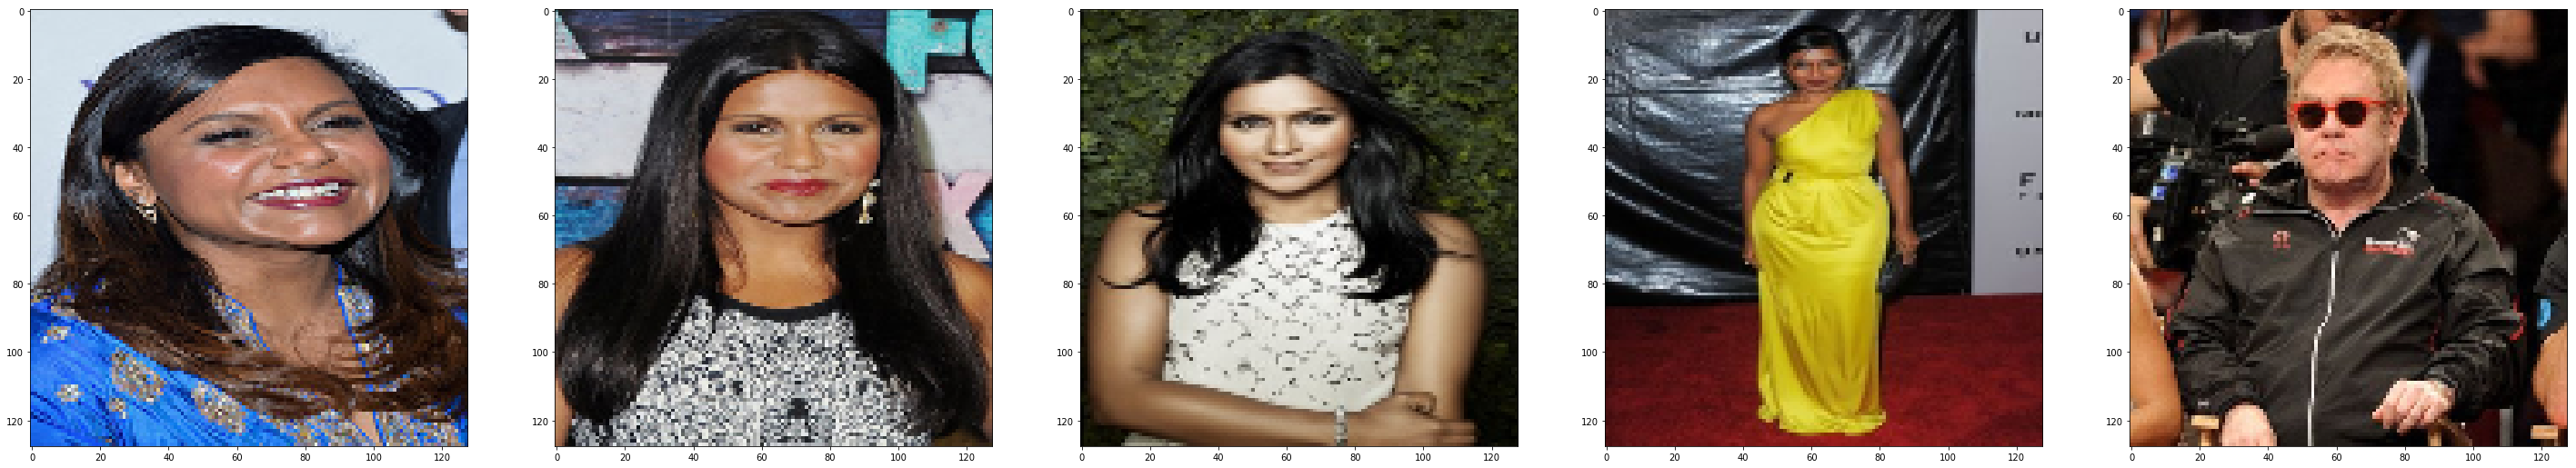

In [87]:
top5(encodings[71])

In [ ]:
# So with just 100 imges we can still get good classifier using triplet loss model